min time 72851.62326612402


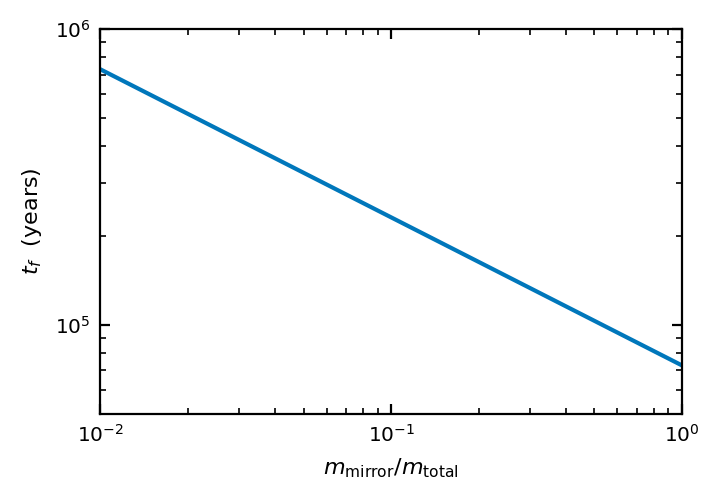

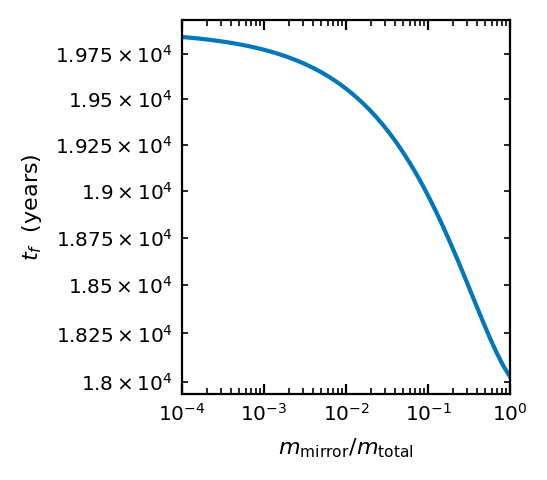

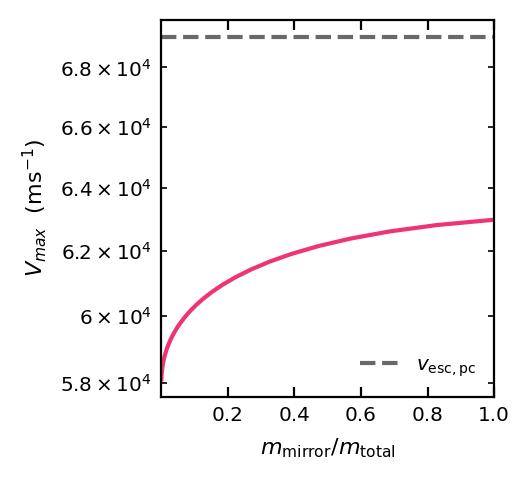

69046.01636227829 False


In [54]:
import numpy as np
import matplotlib.pyplot as plt
def both_ticks(fontsize):
    plt.tick_params(axis='both', which='major', direction="in", labelsize=fontsize*0.9, top=True, right=True)
    plt.tick_params(axis='both', which='minor', direction="in", labelsize=fontsize*0.9, top=True, right=True)

colours = [
    "#0077BB",  # Blue
    "#33BBEE",  # Cyan
    "#009988",  # Teal
    "#EE7733",  # Orange
    "#CC3311",  # Red
    "#EE3377",  # Magenta
]

R = 0.89
au = 1.496e11
L_sun = 3.83e26
seconds_year = 3.156e7
c = 2.998e8
light_year = seconds_year * c
g=9.81
L_star =0.00157 * L_sun
rho = 0.27e-3 # kg per m^2 for 2.5um mylar coated in 100nm Al
r_0 = 0.05 * au
V_b0 = 55e3
u_pc0=-22e3
m = (22.4/26.7)/seconds_year
x_0 = 4.2 * light_year

def time_travelled(m_mir_m_tot):
    V_max = np.sqrt(((m_mir_m_tot * (1 + R) * L_star) / (2 *np.pi * c * rho*r_0)))
    return x_0 / (V_max)

import numpy as np

def travel_time_sail(m_mir_m_tot_input):
    """
    Compute t_f based precisely on the Maple calculation.
    
    Global variables must be set before calling this function:
    m_mir_m_tot, R, L_star, c, rho, r_0, V_b0, x_0, m
    
    Parameters:
    -----------
    m_mir_m_tot_input : float or numpy.ndarray
        Mass ratio input
    
    Returns:
    --------
    numpy.ndarray
        Result of the calculation
    """
    # Ensure input is a numpy array
    m_mir_m_tot_input = np.asarray(m_mir_m_tot_input)
    
    # First term
    first_sqrt_inner = (m_mir_m_tot_input * (1 + R)/2 * L_star) / (np.pi * c * rho * r_0)
    first_term = np.sqrt(2) * np.sqrt(first_sqrt_inner)
    
    # Second term
    
    second_term = ((1/ (np.pi * c * rho * r_0)) *(
        2 * np.sqrt(2) * np.sqrt(first_sqrt_inner) * V_b0 * np.pi * c * rho * r_0 + 
        2 * (V_b0 ** 2) * np.pi * c * rho * r_0 + 
        4 * m * x_0 * np.pi * c * rho * r_0 + 
        m_mir_m_tot_input * L_star * R + 
        m_mir_m_tot_input * L_star
    ))
    
    return -1 / (2 * m) *(first_term -np.sqrt(2)*np.sqrt(second_term) + 2 * V_b0)

def distance(t_f):
    return m*t_f**2 + u_pc0 * t_f + x_0

m_mir_m_tot = np.logspace(-4,0)

fontsize=8
plt.figure(figsize=[3*1.25,2*1.25], dpi=200)
plt.plot(m_mir_m_tot, 
         time_travelled(m_mir_m_tot) / seconds_year,
         c = colours[0]
         )
print("min time", np.min(time_travelled(m_mir_m_tot) / seconds_year))
plt.xscale("log")
plt.yscale("log")
plt.rc('text', usetex=True)  # Enable LaTeX
plt.xlabel("$m_{\mathrm{mirror}} / m_{\mathrm{total}}$", fontsize=fontsize)
plt.ylabel("$t_f$  (years)", fontsize=fontsize)
plt.rc('text', usetex=False)  # Disable LaTeX
both_ticks(fontsize)
plt.ylim(0.5e5,1e6)
plt.xlim(1e-2,1)
#plt.legend(frameon=False, fontsize=fontsize*0.9)    
plt.show()


plt.figure(figsize=[2.2*1.25,2*1.25], dpi=200)
plt.plot(m_mir_m_tot, 
         travel_time_sail(m_mir_m_tot) / seconds_year,
         c = colours[0]
         )

plt.xscale("log")
plt.yscale("log")
plt.rc('text', usetex=True)  # Enable LaTeX
plt.xlabel("$m_{\mathrm{mirror}} / m_{\mathrm{total}}$", fontsize=fontsize)
plt.ylabel("$t_f$  (years)", fontsize=fontsize)
plt.rc('text', usetex=False)  # Disable LaTeX
both_ticks(fontsize)
plt.tight_layout()
plt.xlim(1e-4,1)
#plt.legend(frameon=False, fontsize=fontsize*0.9)    
plt.show()



v_esc=np.sqrt(2*6.67430*10**(-11) * (1.989*10**30) /au)
plt.figure(figsize=[2.2*1.25,2*1.25], dpi=200)
plt.plot(m_mir_m_tot, 
         (distance(travel_time_sail(m_mir_m_tot))/travel_time_sail(m_mir_m_tot)),
         c = colours[5]
         )
v_esc_star=np.sqrt(2.2*6.67430*10**(-11) * (0.1221*1.989*10**30) /(0.05*au))

plt.yscale("log")
plt.rc('text', usetex=True)  # Enable LaTeX
plt.hlines([v_esc_star], 1e-4,1, "dimgrey", "dashed", label = "$v_\mathrm{esc, pc}$")
plt.xlabel("$m_{\mathrm{mirror}} / m_{\mathrm{total}}$", fontsize=fontsize)
plt.ylabel("$V_{max}$  (ms$^{-1}$)", fontsize=fontsize)
plt.rc('text', usetex=False)  # Disable LaTeX
both_ticks(fontsize)
plt.xlim(1e-4,1)
#plt.legend(frameon=False, fontsize=fontsize*0.9)    
plt.tight_layout()
plt.legend(frameon=False, fontsize=fontsize*0.9, loc="lower right")
plt.show()

print(v_esc_star, v_esc_star < v_esc)
